In [1]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt
from math import gamma

In [2]:
#ТАБЛИЧНЫЕ ВЕЛИЧИНЫ


#Радиус Бора
a_0 =  0.52917721067*10**(-8)

#Число Авогадро
Na = 6.022* 10**(23)

#Энергия Хартри (keV)
E_h = 0.02721138602 

In [3]:
#ИНФОРМАЦИЯ ОБ АТОМЕ


#Атомный вес
A = 196.96657
z = 79

In [4]:
#ИЗМЕНЯЮЩИЕСЯ ПАРАМЕТРЫ СИСТЕМЫ


#Плотность
rho_0 = 1.000

In [6]:
#ВСПОМОГАТЕЛЬНЫЕ ФУНКЦИИ


#Функция Ферми-Дирака I_1/2
def integral_1_2(x):
    sqx=x**(1/2)
    xsqx=x*sqx
    #Апроксимация функции дирака трёхчленной формулой при k=1/2
    if (x>=176868.709):
        return xsqx/1.5+0.82246703342411321823620758332301/sqx+0.71027462212293443818237742585514/(x*xsqx);
    elif (x<-17.9):
        return 0.88622692545275801364908374167057*math.exp(x) 
    else: 
        if (x>30.0):
           i0=x
        else:
           i0=math.log(1.0+math.exp(x),math.e)
        
        return (0.8862269254528)*i0*((1.0+1.178*i0+(0.1812102675)*(i0**3.0))**(1.0/6.0)) 

#Функция Ферми-Дирака I_3/2
def integral_3_2(x):
    return 3/10*integral_1_2(x)*(125+60*integral_1_2(x)+18*(integral_1_2(x))**2)**(1/3)

def integral_minus_1_2(x):
    if (x>500000.0):
        return 2*x**(1/2)
    else:
        if (x<-17.9):
            return 2*0.88622692545275801364908374167057*math.exp(x)
        else:
            if (x>30.0):
                i0=x
            else:
                i0=math.log(1.0+math.exp(x))
    
            return 2*(0.8862269254528)*i0*((1.0+1.614*i0+(0.4844730731296)*(i0**3.0))**(-1.0/6.0))


In [7]:
#ПАРАМЕТРЫ ЯЧЕЙКИ


#Безразмерный потенциал
def eta(T,rho):
    q = 2.795*10**(-3)*z*rho/(A*T**(3/2))
    return 1/2*math.log(math.pi/6,math.e)-3/2*math.log((math.exp((2/3*q**2)**(1/3))-1),math.e)

#Заряд ядра
def z_0(T, rho):
    return 317.5 * A * pow(T, (3 / 2))*2/(np.pi**(1/2)) * integral_1_2(-eta(T,rho))/(rho)

#Средний радиус атомной ячейки
def r_0(rho):
    return 1/a_0*(3/(4*math.pi)*A/(rho*Na))**(1/3)

#Объём атомной ячейки
def volume(rho):
    return 4/2*math.pi*(r_0(rho))**3

#Число свободных электронов на атом
def rho_e(T, rho):
    return z_0(T, rho)/volume(rho)

#Характеристическая температура
def theta(T):
    return T/E_h

In [8]:
#ВАЖНЫЕ ФУНКЦИИ СОСТОЯНИЯ


#Потенциал в модели ППЭ
def V(r, T, rho):
    return z/r * (1 - 3 / 2 * r / r_0(rho) + 1 / 2 * pow((r / (r_0(rho))), 3))

#Аппроксимация давления электронного газа
def P_e(T, rho):
    return rho_e(T, rho)*((theta(T))**3+3.36*rho_e(T, rho)*(theta(T))**(3/2)+9/125*(math.pi)**4*(rho_e(T, rho))**2)**(1/3)

#Полное давление (ГПа)
def P(T, rho):
    return 2.942*10**4*(P_e(T,rho)+theta(T)/volume(rho))


In [10]:
Y_P = [[],[],[],[],[],[]]
X_rho = [[],[],[],[],[],[]]
i = -3
T = 10
r_glushka = r_0(rho_0)
while i<3:
    rho = 10**i
    eta_test = eta(T,rho)
    z_0(T,rho)
    r_0(rho)

    volume(rho)
    rho_e(T,rho)
    theta(T)
    P_e(T,rho)
    P(T,rho)
    y = P(T,rho)
    Y_P[1].append(math.log(y,10))
    X_rho[1].append(i)
    i+=0.2

Plot:  1   T=  10


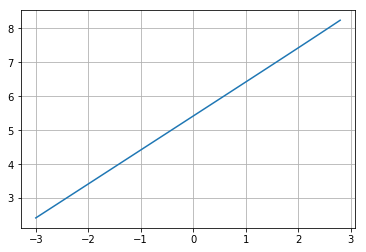

In [11]:
fig = plt.figure()
#for i in range(0,6):
graph1 = plt.plot(X_rho[1], Y_P[1])
print('Plot: ',1,' ','T= ', 10 )



# save(name='pic_2_1', fmt='pdf')
# save(name='pic_2_1', fmt='png')
plt.grid(True)
plt.show()

In [12]:
Y_V_r = [[],[],[],[],[],[]]
X_r = [[],[],[],[],[],[]]
for i in range(0,6):
    T = 0.01 + i*2
    r = 0.001
    r_0(rho_0)
    while r < r_0(rho_0):
        eta(T,rho_0)
        z_0(T,rho_0)
        V(r,T,rho_0)

        y = V(r,T,rho_0)*r
        Y_V_r[i].append(y)
        X_r[i].append(r)
        r += 0.01

Plot:  1   T=  0.01
Plot:  2   T=  2.01
Plot:  3   T=  4.01
Plot:  4   T=  6.01
Plot:  5   T=  8.01
Plot:  6   T=  10.01


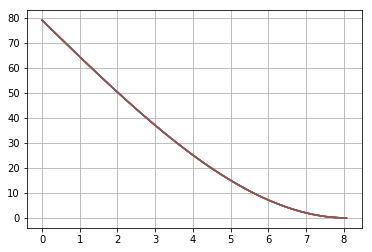

In [13]:
fig = plt.figure()
for i in range(0,6):
    graph1 = plt.plot(X_r[i], Y_V_r[i])
    print('Plot: ',i+1,' ','T= ', 0.01 + i*2 )



# save(name='pic_2_1', fmt='pdf')
# save(name='pic_2_1', fmt='png')
plt.grid(True)
plt.show()

In [56]:
#ВСЁ ДЛЯ ЛИНЕАРИЗАЦИИ И ПРОГОНКИ С ИТЕРАЦИЯМИ
N = 999
s = 5
T_current = 0.1
s_current = 0

PHI_S = [[0]*(N+1)]*5
X = [0]*(N+1)
A = [0]*(N+1)
B = [0]*(N+1)
C = [0]*(N+1)
D = [0]*(N+1)
ITERATIONS = [[0]*(N+1)]*5
RESULT0 = [0]*(N+1)
RESULT1 = [0]*(N+1)
RESULT2 = [0]*(N+1)
RESULT3 = [0]*(N+1)
RESULT4 = [0]*(N+1)
ALPHA = [0]*(N+1)
BETA = [0]*(N+1)
Y = [0]*(N+1)
#константа а в уравнении 
const = 4*(2*theta(T_current))**2/math.pi*(r_glushka)**2 


#СЕТКА  
def x():
    for i in range(N+1):
       
        X[i] = (i/N)**2   
def phi(s = s_current,T = T_current,rho = rho_0):
    for i in range(N+1):
       
        if i == 0:
            PHI_S[s_current][0] = z/(theta(T)*r_glushka)
        else:
            PHI_S[s_current][i] = z/(theta(T)*r_glushka)*(1-3/2*X[i]+1/2*X[i]**3)-theta(T)*X[i]


#ШАГ СЕТКИ
def h(N):
    return 1-X[N-1]
#КОЭФФИЦИЕНТЫ
def a():
    for i in range(1,N):
      
        A[i] = 1/(X[i]-X[i-1])
def c():
    for i in range(1,N):
        C[i] =  1/(X[i+1]-X[i])
def b(s = s_current):
    for i in range(1,N):

        B[i] =  -A[i]-C[i]-const/4*(X[i+1]-X[i-1])*integral_minus_1_2(PHI_S[s_current][i]/X[i])
def d(s = s_current):
    for i in range(1,N):
        D[i] = const*(X[i+1]-X[i-1])*((X[i]/2*integral_1_2(PHI_S[s_current][i])) - PHI_S[s_current][i]/4*integral_minus_1_2(PHI_S[s_current][i]/X[i]))
def alpha(s = s_current):
    for i in range(N-1,-1,-1):
        if i==N-1:
            ALPHA[i] = 1/(1-h(N)+h(N)**2/4*const*integral_minus_1_2(PHI_S[s_current][N]))
        else:
            ALPHA[i] = -A[i+1]/(B[i+1]+C[i+1]*ALPHA[i+1])
def beta(s = s_current):
    for i in range(N-1,-1,-1):
        if i==N-1:
            BETA[i] = -h(N)**2/2*const*(integral_1_2(PHI_S[s_current][N])-PHI_S[s_current][i]/2*integral_minus_1_2(PHI_S[s_current][N]))*ALPHA[N-1]
        else:
            BETA[i] = (D[i+1]-C[i+1]*BETA[i+1])/(B[i+1]+C[i+1]*ALPHA[i+1])
#ИСКОМОЕ УРАВНЕНИЕ
def y(T = T_current):
    for i in range(N+1):
        if i==0:
            Y[i] =  z/(theta(T)*r_glushka)
        else:
            Y[i] = ALPHA[i-1]*Y[i-1]+BETA[i-1]    
    

In [57]:
print('s_current=',s_current)
h(N)
print(h(N))
x()
#print("X=",X)
phi()
#print(phi(0))
#print("PHI_S_0 =", PHI_S[s_current])
a()
#print("A=", A)
c()
#print("C=",C)
b()
#print("B=", B)
d()
#print("D=", D)
alpha()
#print("ALPHA=", ALPHA)
beta()
#print("BETA=", BETA)
y()
#print("Y=", Y)
for i in range(N+1):
    RESULT0[i] =PHI_S[s_current][i]*theta(T_current)
s_current = s_current+1
print('s_current=',s_current)
for i in range(N+1):
    PHI_S[s_current][i] = Y[i]
    #print(PHI_S[s_current][i])

a()
#print("A=", A)
c()
#print("C=",C)
b()
#print("B=", B)
d()
#print("D=", D)
alpha()
#print("ALPHA=", ALPHA)
beta()
#print("BETA=", BETA)
y()
#print("Y=", Y)
for i in range(N+1):
    RESULT1[i] =Y[i]*theta(T_current)
s_current = s_current+1
print('s_current=',s_current)
for i in range(N+1):
    PHI_S[s_current][i] = Y[i]
    #print(PHI_S[s_current][i])

a()
#print("A=", A)
c()
#print("C=",C)
b()
#print("B=", B)
d()
#print("D=", D)
alpha()
#print("ALPHA=", ALPHA)
beta()
#print("BETA=", BETA)
y()
#print("Y=", Y)
for i in range(N+1):
    RESULT2[i] =Y[i]*theta(T_current)
s_current = s_current+1
print('s_current=',s_current)
for i in range(N+1):
    PHI_S[s_current][i] = Y[i]
    #print(PHI_S[s_current][i])

a()
#print("A=", A)
c()
#print("C=",C)
b()
#print("B=", B)
d()
#print("D=", D)
alpha()
#print("ALPHA=", ALPHA)
beta()
#print("BETA=", BETA)
y()
#print("Y=", Y)
for i in range(N+1):
    RESULT3[i] =Y[i]*theta(T_current)
s_current = s_current+1
print('s_current=',s_current)
for i in range(N+1):
    PHI_S[s_current][i] = Y[i]
    #print(PHI_S[s_current][i])

s_current= 0
1
s_current= 1
s_current= 2
s_current= 3
s_current= 4


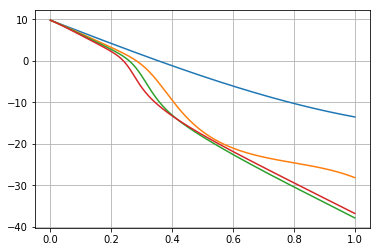

In [58]:
fig = plt.figure()
graph1 = plt.plot(X,RESULT0)
graph2 = plt.plot(X,RESULT1)
graph3 = plt.plot(X,RESULT2)
graph4 = plt.plot(X,RESULT3)

plt.grid(True)
plt.show()

In [59]:
print(theta(T_current))

3.6749322480854656


In [60]:

RESULT_V = [0]*(N+1)
R = []
F = [[0]*(N+1)]*5
V = [[0]*(N+1)]*5 
for i in range(N+1):
    R.append(X[i]*r_glushka)

mu = -theta(T_current)*eta_test
for i in range(N+1):
    if i==0:
        F[0][i] = z/theta(T_current)
    else:
        F[0][i] = PHI_S[2][i]*R[i]/X[i]
for i in range(1,N+1):
    if i==N:
        V[0][i] = 0
    else:
        V[0][i] = F[0][i]*theta(T_current)/R[i] - mu
for i in range(N+1):
    if i==0:
        RESULT_V[i] = z
    else:
        RESULT_V[i] = V[0][i]*R[i]


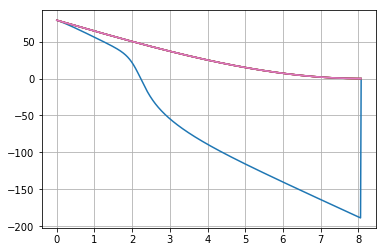

In [62]:
fig = plt.figure()
graph1 = plt.plot(R,RESULT_V)
for i in range(0,6):
    graph2 = plt.plot(X_r[i], Y_V_r[i])
plt.grid(True)
plt.show()

In [65]:
print(PHI_S[0][0] - z/(theta(T_current)*r_glushka))
      

0.0
